In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [133]:
df_train = pd.read_csv('data/train.csv')
df_train.shape

(800, 22)

In [134]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [136]:
df_train.dtypes

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

In [137]:
df_train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [139]:
# let's check unique values
columns=df_train.columns
for col in columns:
    print(col,':\n',df_train[col].unique())
    print(df_train[col].value_counts())
    print('\n',20*'**','\n')

ID :
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'A1_Score'}>,
        <AxesSubplot:title={'center':'A2_Score'}>,
        <AxesSubplot:title={'center':'A3_Score'}>],
       [<AxesSubplot:title={'center':'A4_Score'}>,
        <AxesSubplot:title={'center':'A5_Score'}>,
        <AxesSubplot:title={'center':'A6_Score'}>,
        <AxesSubplot:title={'center':'A7_Score'}>],
       [<AxesSubplot:title={'center':'A8_Score'}>,
        <AxesSubplot:title={'center':'A9_Score'}>,
        <AxesSubplot:title={'center':'A10_Score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'result'}>,
        <AxesSubplot:title={'center':'Class/ASD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

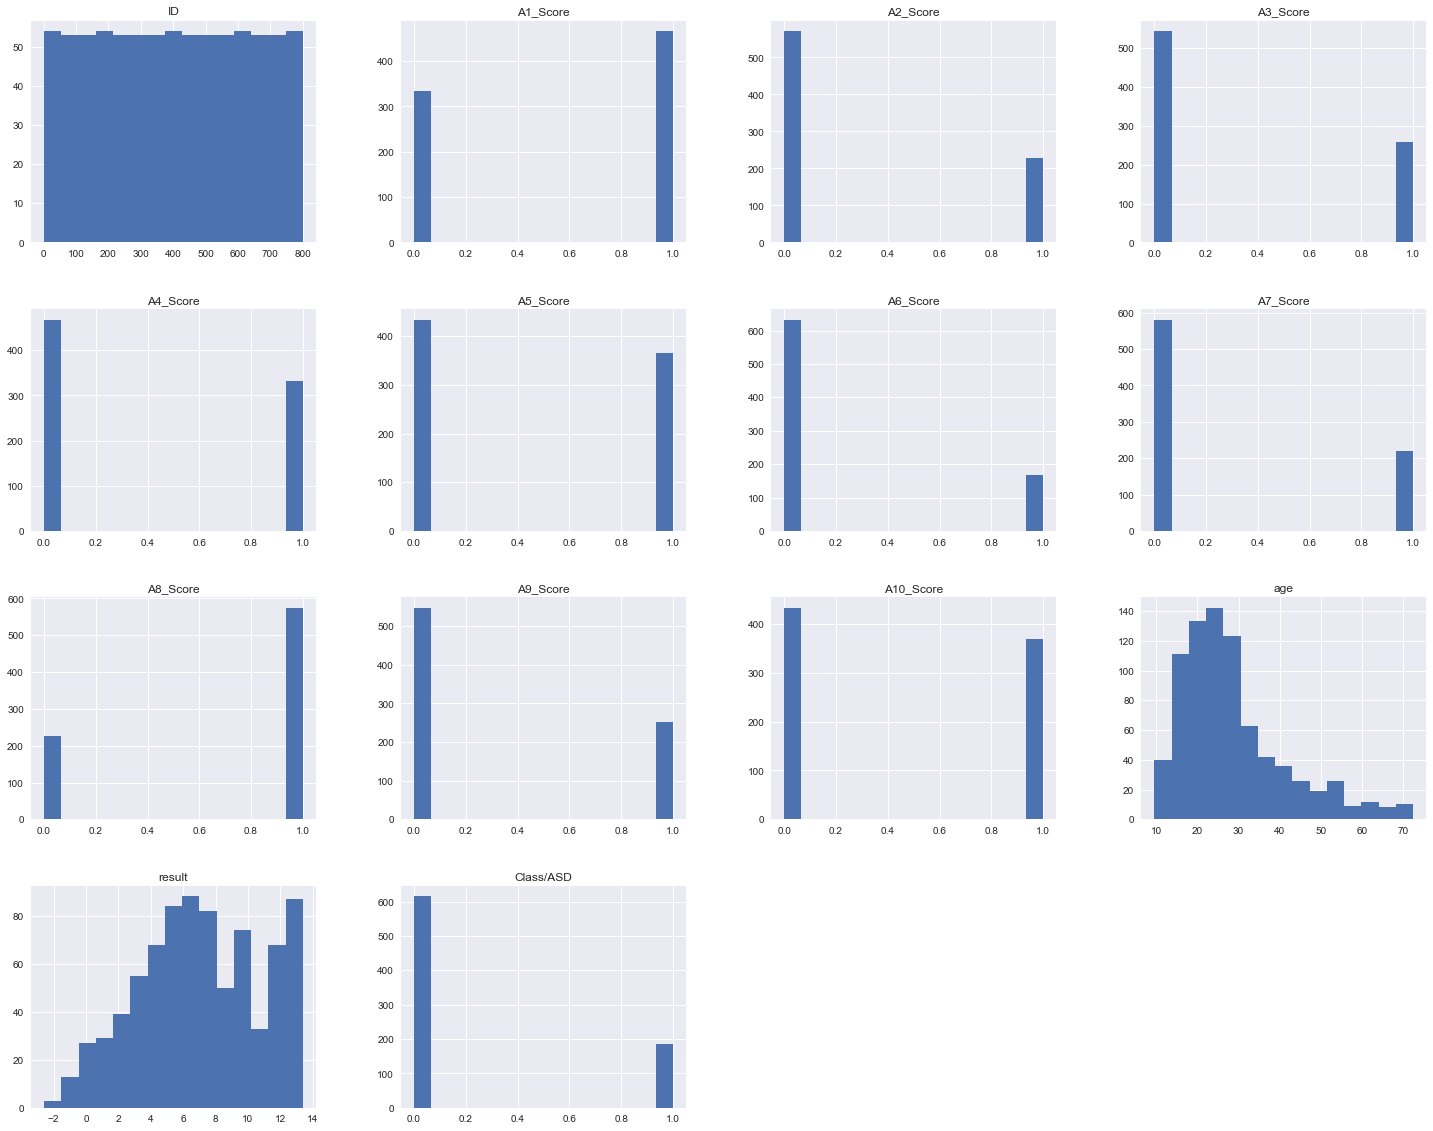

In [140]:
plt.style.use("seaborn")
df_train.hist(figsize=(25,20), bins=15)

### Data Cleaning

In [141]:
# Are there any missing values?
df_train.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [142]:
df_train['ethnicity'].value_counts()

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

In [143]:
df_train['relation'].value_counts()

Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: relation, dtype: int64

In [158]:
df_train['contry_of_res'].value_counts()

United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
                       ... 
Indonesia                 1
Tonga                     1
Iraq                      1
Finland                   1
Niger                     1
Name: contry_of_res, Length: 61, dtype: int64

In [144]:
df_train = df_train.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

In [145]:
df_train.drop(columns=["ID"],inplace=True)

### Exploratory Data Analysis

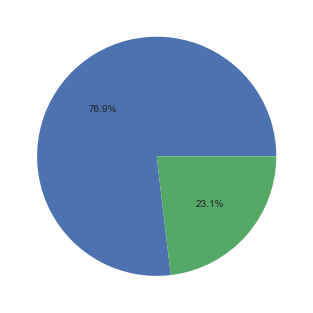

In [148]:
plt.pie(df_train['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

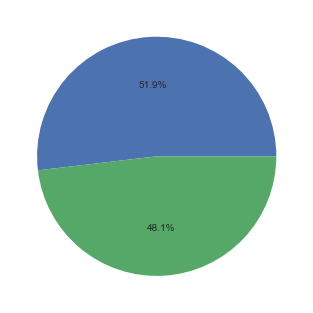

In [149]:
plt.pie(df_train['gender'].value_counts().values, autopct='%1.1f%%')
plt.show()

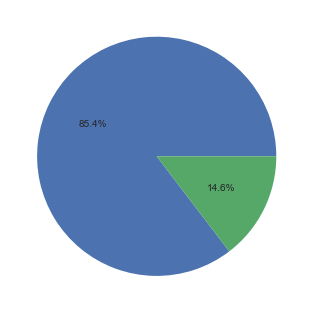

In [155]:
plt.pie(df_train['austim'].value_counts().values, autopct='%1.1f%%')
plt.show()

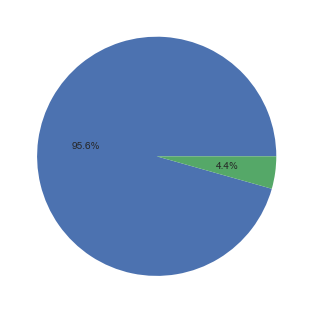

In [159]:
plt.pie(df_train['used_app_before'].value_counts().values, autopct='%1.1f%%')
plt.show()

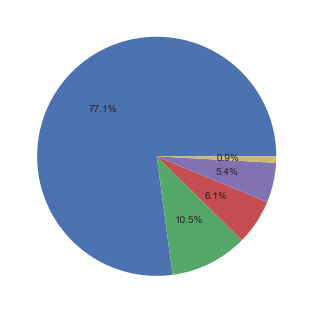

In [163]:
plt.pie(df_train['relation'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [157]:
df_train.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jaundice,austim,used_app_before,result,Class/ASD
A1_Score,1.000000,0.244540,0.316452,0.322089,0.350073,0.291400,0.201426,0.240094,0.308672,0.308402,0.068834,0.093295,0.163893,0.044768,0.319993,0.289991
A2_Score,0.244540,1.000000,0.387516,0.359008,0.295492,0.361972,0.262422,0.194671,0.401893,0.342131,0.120668,0.108634,0.246594,0.053828,0.340213,0.380703
A3_Score,0.316452,0.387516,1.000000,0.518000,0.448251,0.489724,0.352090,0.229524,0.539535,0.460727,0.189076,0.174493,0.359190,0.022985,0.479438,0.549618
A4_Score,0.322089,0.359008,0.518000,1.000000,0.540342,0.447535,0.353415,0.297467,0.523767,0.439180,0.182165,0.121866,0.283196,0.055504,0.503638,0.512792
A5_Score,0.350073,0.295492,0.448251,0.540342,1.000000,0.411152,0.381568,0.252989,0.486979,0.436171,0.121511,0.136105,0.273182,0.036648,0.509091,0.448473
A6_Score,0.291400,0.361972,0.489724,0.447535,0.411152,1.000000,0.374446,0.240317,0.510524,0.402234,0.144511,0.172238,0.353182,0.025469,0.460065,0.542588
A7_Score,0.201426,0.262422,0.352090,0.353415,0.381568,0.374446,1.000000,0.154847,0.414423,0.310831,0.188604,0.119578,0.285386,0.019446,0.399434,0.394660
A8_Score,0.240094,0.194671,0.229524,0.297467,0.252989,0.240317,0.154847,1.000000,0.223737,0.250461,0.115754,0.092766,0.157560,0.025621,0.232593,0.219034
A9_Score,0.308672,0.401893,0.539535,0.523767,0.486979,0.510524,0.414423,0.223737,1.000000,0.488759,0.207493,0.156347,0.342321,-0.014046,0.536908,0.538688
A10_Score,0.308402,0.342131,0.460727,0.439180,0.436171,0.402234,0.310831,0.250461,0.488759,1.000000,0.105762,0.156517,0.270992,0.084607,0.466246,0.439587


(16.5, -0.5)

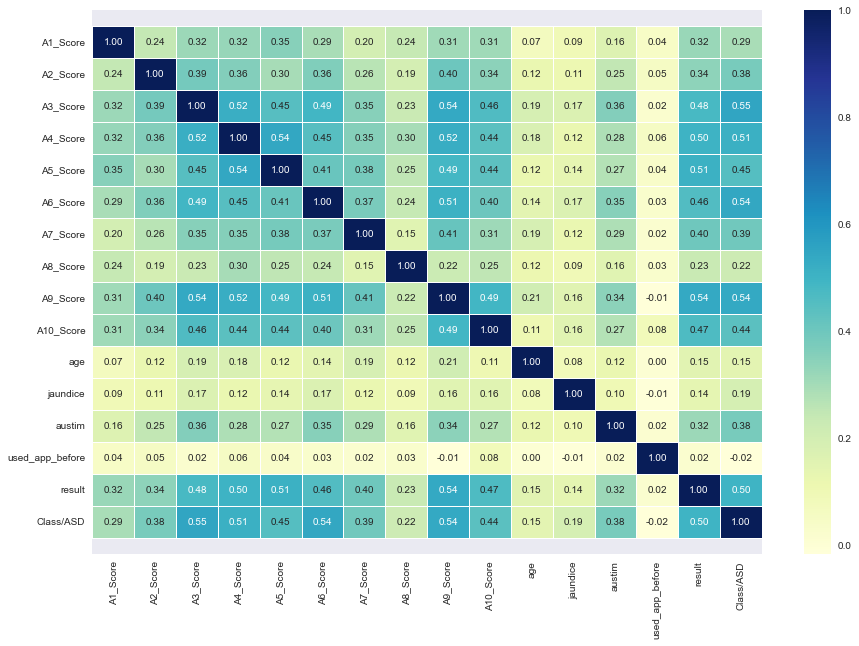

In [167]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Feature Engineering

In [168]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df_train['ageGroup'] = df_train['age'].apply(convertAge)

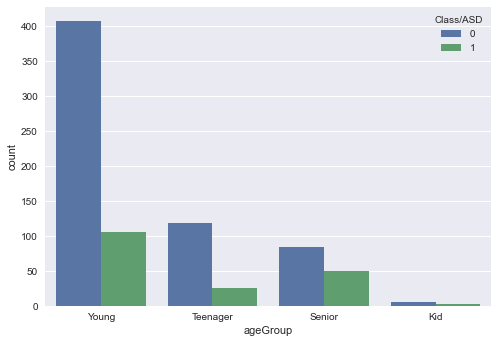

In [88]:
sb.countplot(x=df_train['ageGroup'], hue=df_train['Class/ASD'])
plt.show()

In [169]:
def add_feature(data):

# Creating a column with all values zero
    data['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
	
	# Updating the 'sum_score' value with scores
	# from A1 to A10
        data['sum_score'] += data[col]

# Creating a random data using the below three columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

    return data

df_train = add_feature(df_train)

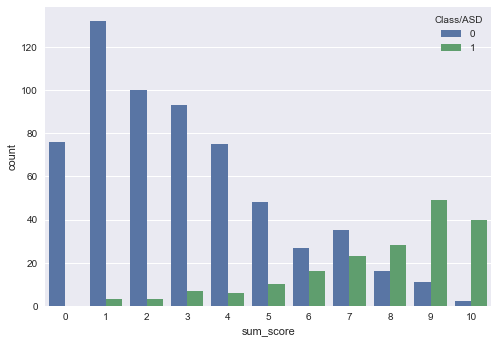

In [172]:
sb.countplot(x=df_train['sum_score'], hue=df_train['Class/ASD'])
plt.show()

In [173]:
# Applying log transformations to remove the skewness of the data.
df_train['age'] = df_train['age'].apply(lambda x: np.log(x))

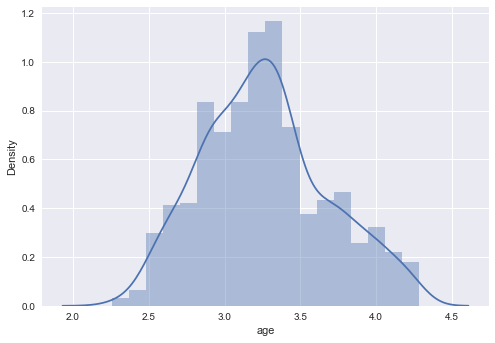

In [174]:
sb.distplot(df_train['age'])
plt.show()